# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd

import random

import matplotlib as plt

import matplotlib.pyplot as plt



## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
random.seed(42)
list_dice = [random.randint(1,6) for i in range(10)]


dice = pd.DataFrame(list_dice, columns =['values'])
dice


,values
0,6
1,1
2,1
3,6
4,3
5,2
6,2
7,2
8,6
9,1


#### 2.- Plot the results sorted by value.

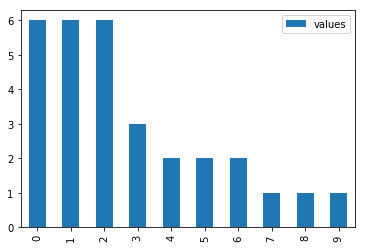

In [3]:
plot_dice = dice.sort_values('values', ascending = False).reset_index(drop=True)

plot_dice.plot(kind='bar')

plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

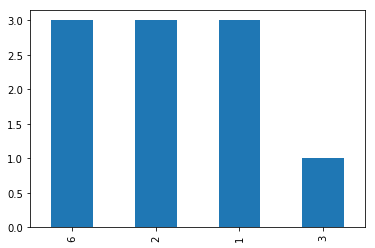

In [4]:
dice['values'].value_counts().plot(kind ='bar')
plt.show()

There are 3 rounds with a 6 value.

There ara 3 rounds with a 2 value.

There are 3 rounds with a 1 value.

There is 1 round wiht a 3 value.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
def mean(x):
    mean_temporal = 0
    for i in x:
        mean_temporal += i
    mean_temporal = mean_temporal/len(x)
    return mean_temporal

mean_dice = mean(dice['values'])
mean_dice

3.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
a = dice['values'].value_counts()


b = dice['values'].value_counts().index
print(a, b)

6    3
2    3
1    3
3    1
Name: values, dtype: int64 Int64Index([6, 2, 1, 3], dtype='int64')


In [7]:
##x= values dice; y= frequency distribution
def mean_freq (df,column):
    frequency = df[column].value_counts()
    values = frequency.values
    dice_value = frequency.index
    mean2 = values*dice_value
    mean2 = sum(mean2)/sum(values)
    return mean2


mean2 = mean_freq(dice, 'values')
mean2

3.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
def mediana(x):
    #x has to be sorted
    if len(x)%2 == 0:
        mediana = (x[round(len(x)/2,0)] + x[round((len(x)+1)/2,0)])/2
    else:
        mediana = x[len(x)/2]
    return mediana

#order the dataset first
dice.sort_values('values',ascending= False, inplace= True)

##call function
mediana(dice['values'])

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [17]:
def quartiles(x):
        #x has to be sorted
    if len(x)%2 == 0:
        p25 = (x[round(len(x)/4,0)] + x[round(len(x)/4+1,0)])/2
        p75 = (x[round(3*len(x)/4,0)] + x[round((3*len(x)+1)/4,0)])/2

    else:
        p25 = x[len(x)/4]
        p75 = x[3*len(x)/4]
        
    return p25,p75


quartiles(dice['values'])

    

(2.0, 6.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [57]:
file = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col = 0)
file.sort_values('value',ascending = True,inplace = True)

file.head()


,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1


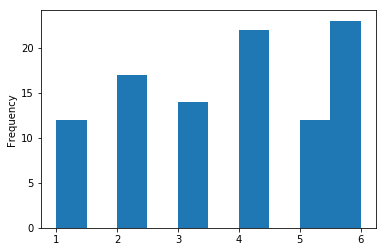

In [62]:
file.value.plot(kind = 'hist')
plt.show()

*There is more than 20 times of frequency distribution to get a 6-value, followed by  4-value.*

*The lowest frequency is 5-value and 1-value with around 10 times of frequency.*

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [63]:
mean(file['value'])

3.74

In [65]:
mean_freq(file,'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [67]:
frequency = file.value.value_counts()
frequency

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

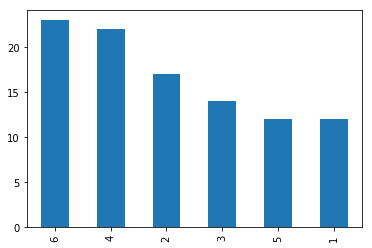

In [70]:
frequency.plot(kind='bar')
plt.show()

*We see how the mean value is computed with a larger weight probability for 6, 4 and 2 dice-values.*

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

*Reading the files*

In [76]:
file2 = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col = 0)
file2.head()

,roll,value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6


*calculate the frequency distribution*

In [77]:
frequency2 = file2.value.value_counts()
frequency2

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

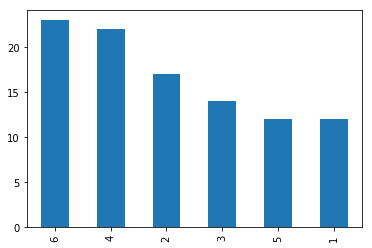

In [78]:
frequency2.plot(kind='bar')
plt.show()

*I think something was wrong because the frequency distribution is the same.*

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [81]:
age = pd.read_csv('../data/ages_population.csv')

age.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [85]:
freq_age = age.observation.value_counts()
freq_age.head()

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
Name: observation, dtype: int64

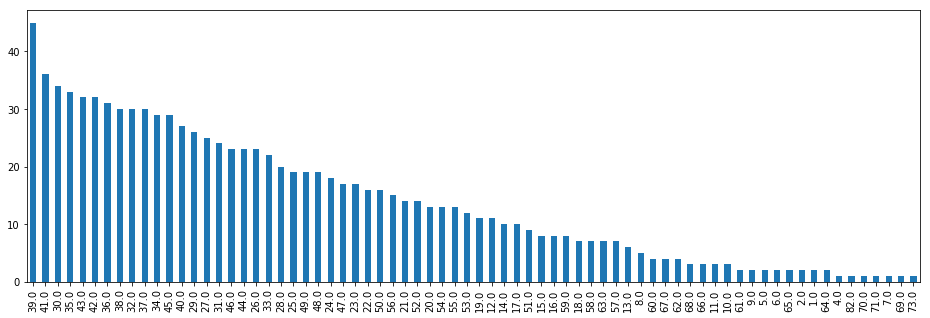

In [107]:
plt.figure(figsize=(16,5))
freq_age.plot(kind = 'bar')
plt.xticks(rotation='vertical')
plt.show()

*I guess the mean is around 36 with a std of 4*

*I think so looking the first 7-8 bars have almost samples.*

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [100]:
print(f'''
mean = {age.mean()}
std = {age.std()}
''')



mean = observation    36.56
dtype: float64
std = observation    12.8165
dtype: float64



the mean was pretty enough exact, the std not so much (  :(  )

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [101]:
age2 = pd.read_csv('../data/ages_population2.csv')

age2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [112]:
freq_age2 = age2.observation.value_counts()
freq_age2.head()

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
Name: observation, dtype: int64

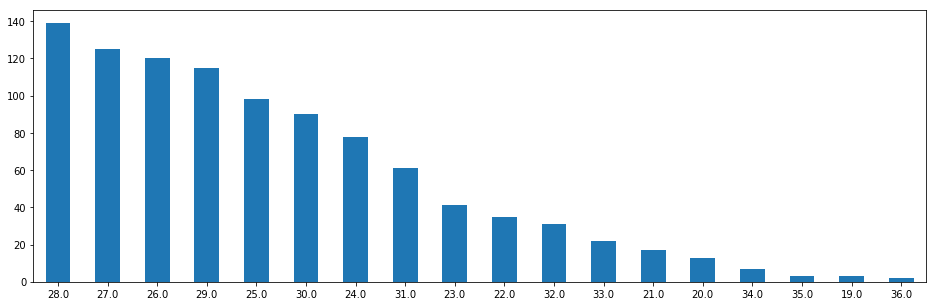

In [113]:
plt.figure(figsize=(16,5))
freq_age2.plot(kind = 'bar')
plt.xticks(rotation=0)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

*Yes, there are. There are less age ranges observed.*

*Also, my guess about the means and std this time would be: mean = 27, std = 3*

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [114]:
print(f'''
mean = {age2.mean()}
std = {age2.std()}
''')



mean = observation    27.155
dtype: float64
std = observation    2.969814
dtype: float64



*I think I hit with much more precission this time (good for me).*

*Besides, the std is 4 times smaller than age file, and the mean now is in the 27's and no 36's*

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [115]:
age3 = pd.read_csv('../data/ages_population3.csv')

age3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [118]:
freq_age3 = age3.observation.value_counts()
freq_age3.head()

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
Name: observation, dtype: int64

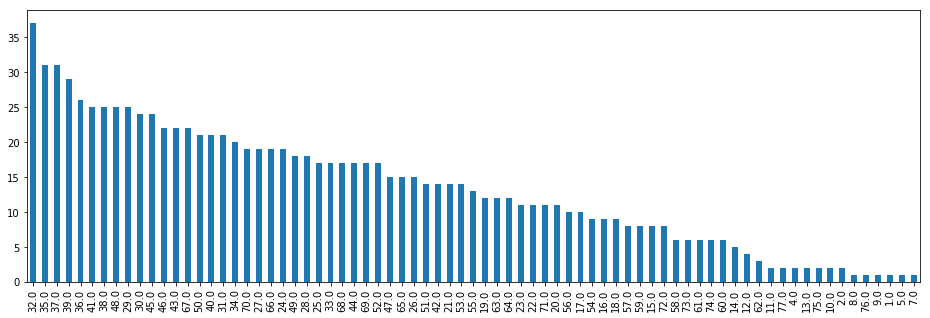

In [120]:
plt.figure(figsize=(16,5))
freq_age3.plot(kind = 'bar')
plt.xticks(rotation='vertical')
plt.show()

In [121]:
print(f'''
mean = {age3.mean()}
std = {age3.std()}
''')



mean = observation    41.989
dtype: float64
std = observation    16.144706
dtype: float64



*The mean value increased from 36 (age file) and 27 (age2 file) up 41*

*The std increased too from 12 (age file) and 3 (age2 file) up 16*

*The frequency distribution has many age values as the same as age file.*

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

### PERCENTIL 25, 50, 75 *AGE FILE*

In [140]:
print(f'''

(p25,p75):{quartiles(age.observation)}
p50:{mediana(age.observation)}
''')



(p25,p75):(47.0, 32.0)
p50:50.0



### PERCENTIL 25, 50, 75 *AGE2 FILE*

In [141]:
print(f'''

(p25,p75):{quartiles(age2.observation)}
p50:{mediana(age2.observation)}
''')



(p25,p75):(27.5, 31.0)
p50:30.0



### PERCENTIL 25,50,  75 *AGE3 FILE*

In [142]:
print(f'''

(p25,p75):{quartiles(age3.observation)}
p50:{mediana(age3.observation)}
''')



(p25,p75):(35.5, 30.0)
p50:32.0



#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""